In [1]:
import pandas as pd

chip = pd.read_csv('chip_dataset.csv')

cpu = chip[chip['Type'] == 'CPU']
cpu = cpu[['Product', 'Release Date', 'Process Size (nm)', 'Transistors (million)', 'Freq (MHz)']]
cpu = cpu.dropna()

cpu

,Product,Release Date,Process Size (nm),Transistors (million),Freq (MHz)
0,AMD Athlon 64 3500+,2007-02-20,65.0,122.0,2200.0
1,AMD Athlon 200GE,2018-09-06,14.0,4800.0,3200.0
3,Intel Xeon E5-2603 v2,2013-09-01,22.0,1400.0,1800.0
4,AMD Phenom II X4 980 BE,2011-05-03,45.0,758.0,3700.0
5,Intel Xeon E5-2470 v2,2013-09-01,22.0,1400.0,2400.0
...,...,...,...,...,...
2186,AMD Sempron 3000+,2005-07-15,90.0,69.0,1800.0
2188,AMD Ryzen 9 4900H,2020-03-16,7.0,9800.0,3300.0
2189,Intel Core 2 Duo E6550,2007-07-01,65.0,291.0,2333.0
2190,AMD Opteron 246,2004-12-01,90.0,106.0,2000.0


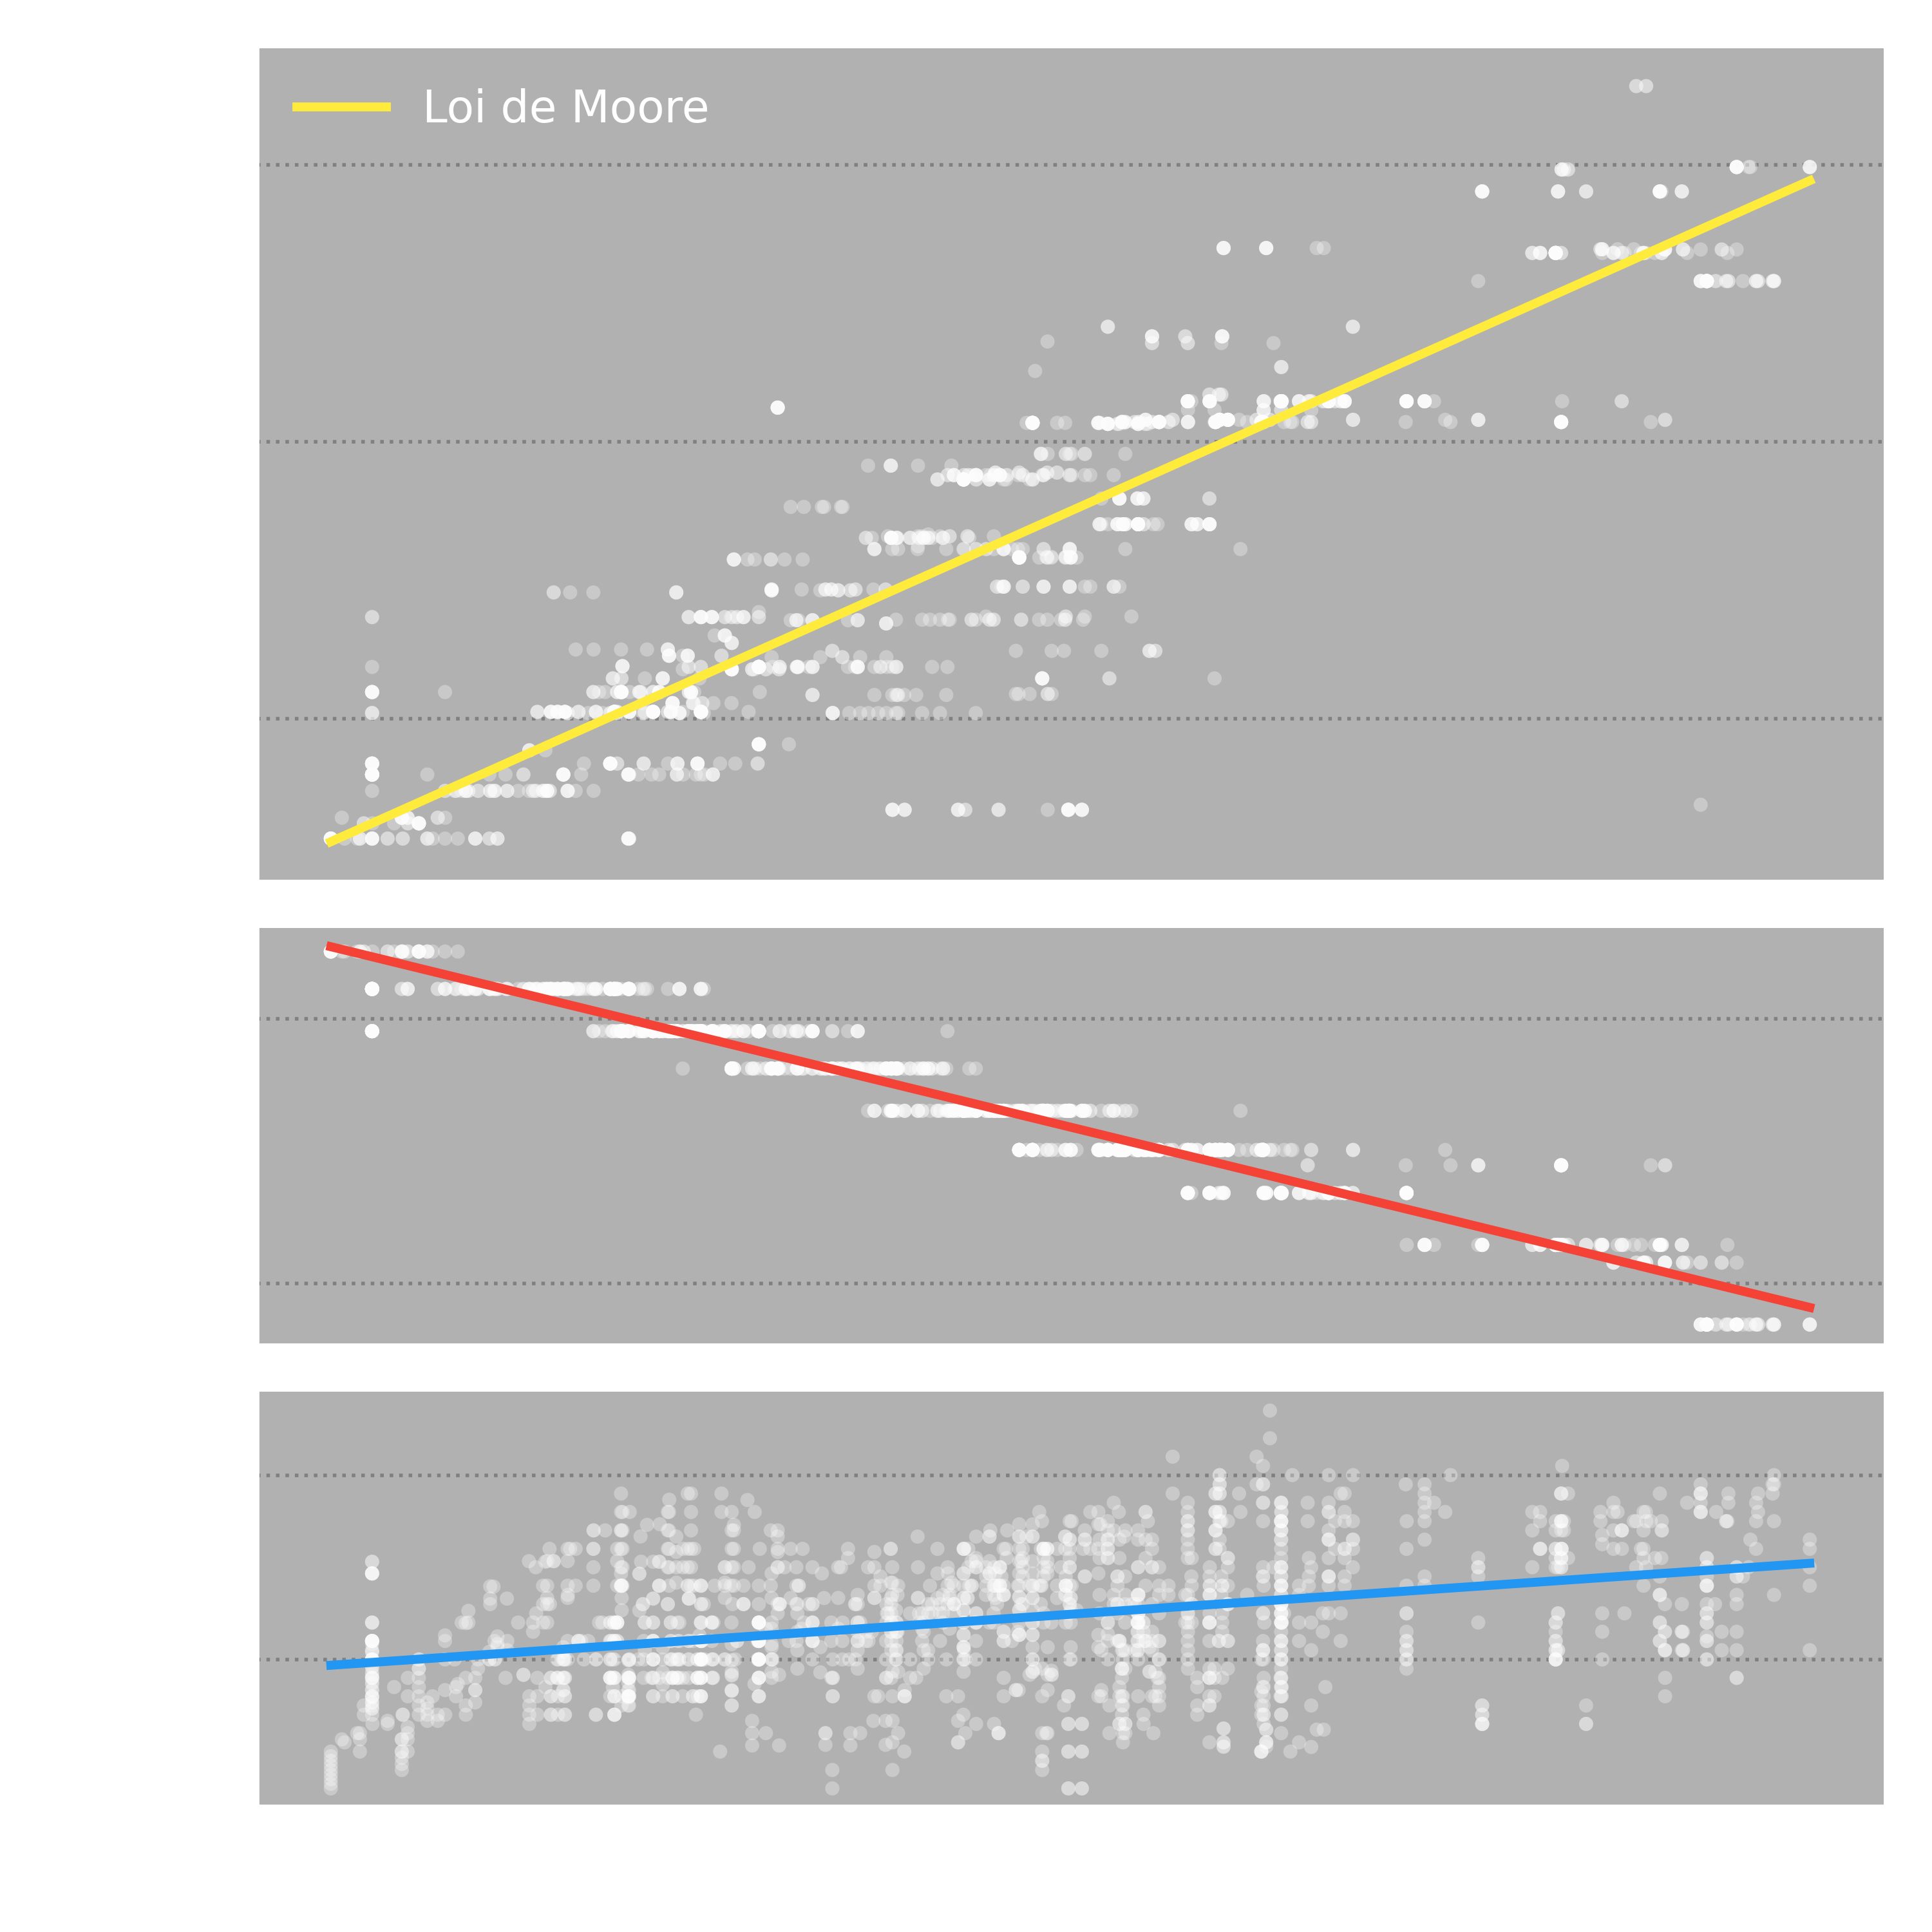

In [107]:
%matplotlib agg
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from IPython.display import display, Image
import arrow

# font_path = 'Inter-Regular.otf' 
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = prop.get_name()

FILENAME = 'figure.png'

as_date = np.vectorize(lambda d: dt.datetime.strptime(d,'%Y-%m-%d').date())
x = as_date(cpu['Release Date'])
ys = [cpu['Transistors (million)'], cpu['Process Size (nm)'], cpu['Freq (MHz)']]
labels = ['Transistors (million)', 'Gravure (nm)', 'Fréquence (MHz)']

plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.3),  # green with alpha = 50%
    "savefig.facecolor": (0.0, 0.0, 0.0, 0.0),  # blue  with alpha = 20%
})


fig, axs = plt.subplots(
    3,
    figsize=(6, 6),
    gridspec_kw={'height_ratios': [2, 1, 1]}, sharex=True
)

for i, (ax, y, label) in enumerate(zip(axs, ys, labels)):
    ax.scatter(x, y, color='white', s=10, alpha=.3, marker='o', edgecolors='none')
    ax.set_ylabel(label)
    ax.spines[['right', 'top', 'bottom']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('white')
    ax.spines[['left', 'bottom']].set_linewidth(1.1)

    ax.tick_params(colors='white', which='both')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dotted')

axs[0].xaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[2].spines[['bottom']].set_visible(True)

axs[0].set_yscale('log')
axs[1].set_yscale('log')

# ---

x_time = [int(arrow.get(d).timestamp()) for d in x]
y_log  = np.log(np.array(ys[0]))
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [np.exp(p(x)) for x in sorted(x_time)]
axs[0].plot(sorted(x), y_time, lw=2, color='#FFEB3B', label="Loi de Moore")

legend = axs[0].legend(labelcolor='white')
frame = legend.get_frame()
frame.set_color('none')



y_log  = np.log(np.array(ys[1]))
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [np.exp(p(x)) for x in sorted(x_time)]
axs[1].plot(sorted(x), y_time, lw=2, color='#F44336')


y_log  = np.array(ys[2])
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [p(x) for x in sorted(x_time)]
axs[2].plot(sorted(x), y_time, lw=2, color='#2196F3')


# ---

fig.align_labels()
fig.tight_layout()
plt.savefig(FILENAME, dpi=500)
display(Image(filename=FILENAME))

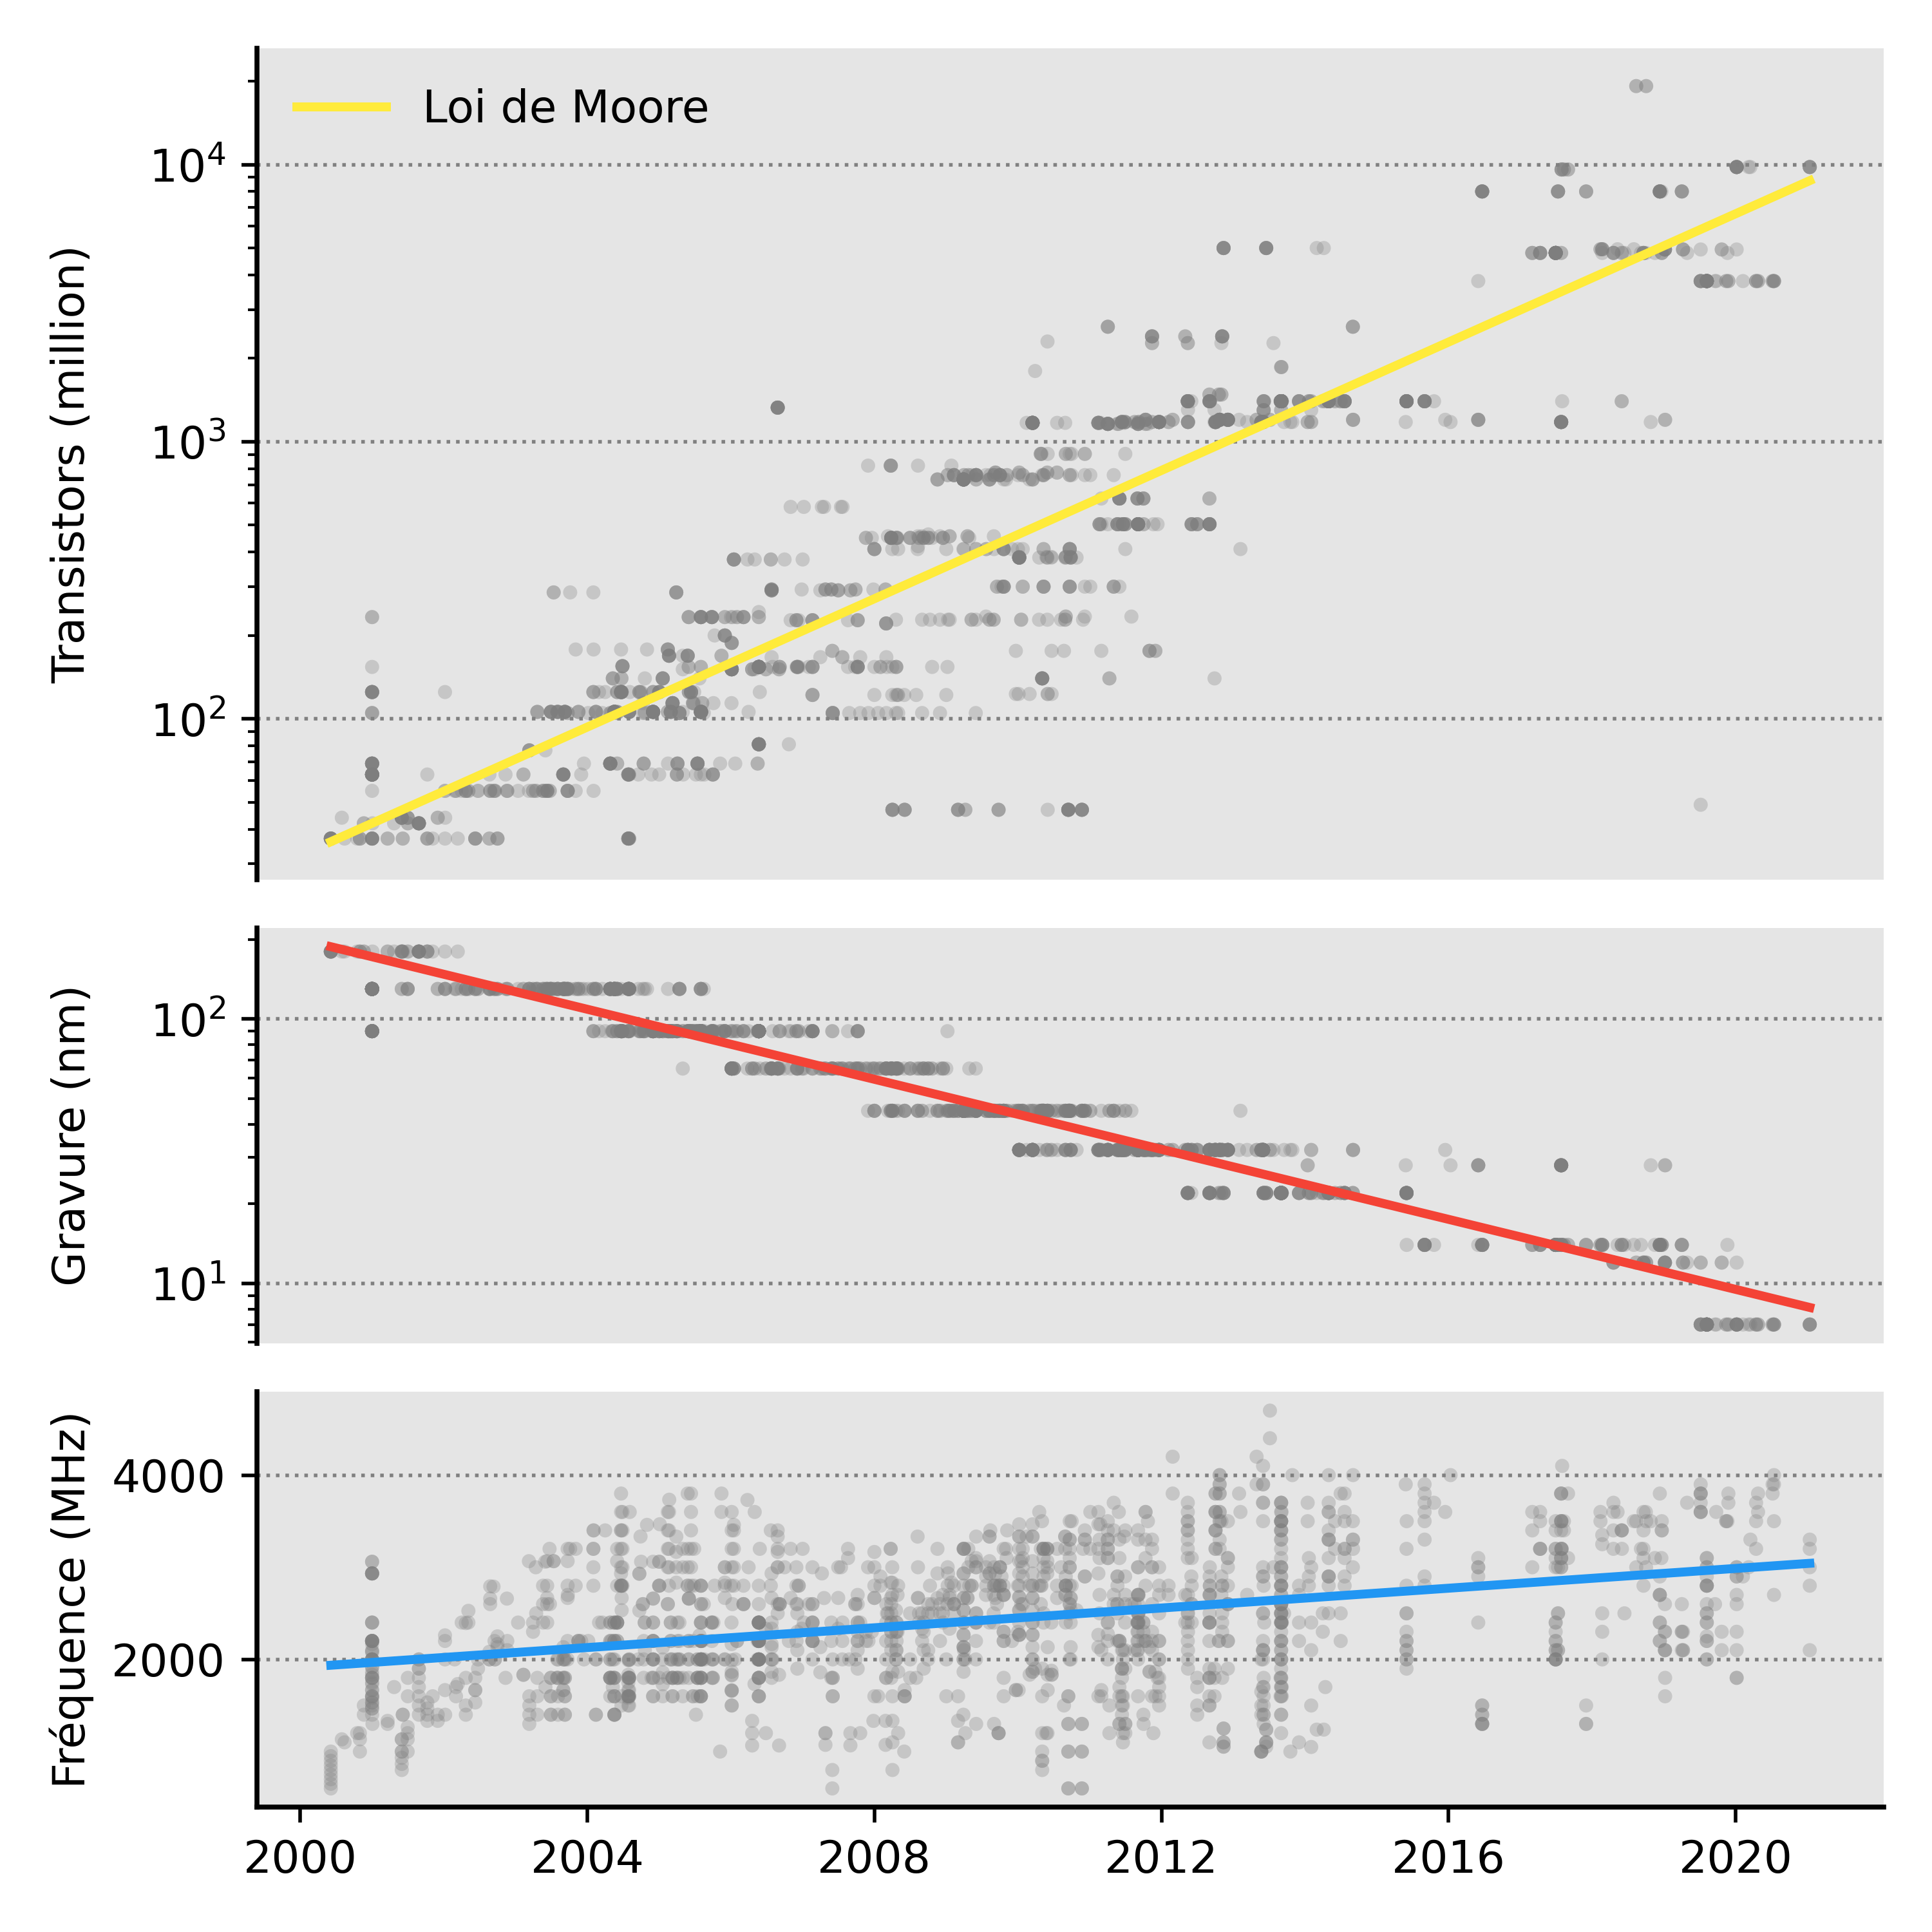

In [116]:
%matplotlib agg
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from IPython.display import display, Image
import arrow

# font_path = 'Inter-Regular.otf' 
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = prop.get_name()

FILENAME = 'figure-light.png'

as_date = np.vectorize(lambda d: dt.datetime.strptime(d,'%Y-%m-%d').date())
x = as_date(cpu['Release Date'])
ys = [cpu['Transistors (million)'], cpu['Process Size (nm)'], cpu['Freq (MHz)']]
labels = ['Transistors (million)', 'Gravure (nm)', 'Fréquence (MHz)']

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # red   with alpha = 30%
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.1),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})


fig, axs = plt.subplots(
    3,
    figsize=(6, 6),
    gridspec_kw={'height_ratios': [2, 1, 1]}, sharex=True
)

for i, (ax, y, label) in enumerate(zip(axs, ys, labels)):
    ax.scatter(x, y, color='grey', s=10, alpha=.3, marker='o', edgecolors='none')
    ax.set_ylabel(label)
    ax.spines[['right', 'top', 'bottom']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('black')
    ax.spines[['left', 'bottom']].set_linewidth(1.1)

    ax.tick_params(colors='black', which='both')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')

    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dotted')

axs[0].xaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[2].spines[['bottom']].set_visible(True)

axs[0].set_yscale('log')
axs[1].set_yscale('log')

# ---

x_time = [int(arrow.get(d).timestamp()) for d in x]
y_log  = np.log(np.array(ys[0]))
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [np.exp(p(x)) for x in sorted(x_time)]
axs[0].plot(sorted(x), y_time, lw=2, color='#FFEB3B', label="Loi de Moore")

legend = axs[0].legend(labelcolor='black')
frame = legend.get_frame()
frame.set_color('none')



y_log  = np.log(np.array(ys[1]))
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [np.exp(p(x)) for x in sorted(x_time)]
axs[1].plot(sorted(x), y_time, lw=2, color='#F44336')


y_log  = np.array(ys[2])
p = np.poly1d(np.polyfit(x_time, y_log, deg=1))
y_time = [p(x) for x in sorted(x_time)]
axs[2].plot(sorted(x), y_time, lw=2, color='#2196F3')


# ---

fig.align_labels()
fig.tight_layout()
plt.savefig(FILENAME, dpi=500)
display(Image(filename=FILENAME))